In [107]:
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
import pandas as pd



In [108]:
api_key = "yHSgTQA4B9TsUGoLuZYHPUMZDFrld0C5TccihhDVX95BUQzMqBp4IiY6DYaBzlpm"
secret_key = "MSX15fdjjGTh39zi2PXgjTLUhBebfk2oIuAi8PgA68NFei5vOH0ZfHIlsUyoyAz4"

In [109]:
client = Client(api_key, secret_key)

In [110]:
tickers = client.get_all_tickers()
ticker_df = pd.DataFrame(tickers)


In [111]:
depth = client.get_order_book(symbol='BTCUSDT')

In [112]:
  
client.get_historical_klines
historical = client.get_historical_klines('LINKUSDT', Client.KLINE_INTERVAL_1DAY, '28 Jul 2022')
hist_df = pd.DataFrame(historical)



In [113]:
hist_df.columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 
                    'Number of Trades', 'TB Base Volume', 'TB Quote Volume', 'Ignore']
hist_df['Open Time'] = pd.to_datetime(hist_df['Open Time']/1000, unit='s')
hist_df['Close Time'] = pd.to_datetime(hist_df['Close Time']/1000, unit='s')


hist_df


,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,2022-07-28,6.86000000,7.29500000,6.67700000,7.21700000,6859329.18000000,2022-07-28 23:59:59.999000064,47808997.45995000,158802,3470622.71000000,24192834.52094000,0
1,2022-07-29,7.21800000,8.11800000,7.11000000,7.88300000,12769838.65000000,2022-07-29 23:59:59.999000064,98558590.00732000,273463,6293081.32000000,48570993.16088000,0
2,2022-07-30,7.88300000,8.21000000,7.66800000,7.82000000,8374838.83000000,2022-07-30 23:59:59.999000064,66142845.40776000,181751,4270621.61000000,33742663.76592000,0
3,2022-07-31,7.82000000,8.09200000,7.57800000,7.65100000,6185487.29000000,2022-07-31 23:59:59.999000064,48549080.23288000,132777,3202007.98000000,25124330.91754000,0
4,2022-08-01,7.65200000,7.88000000,7.40700000,7.57000000,5133233.80000000,2022-08-01 23:59:59.999000064,39088080.69869000,105400,2470346.45000000,18820993.69694000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
118,2022-11-23,6.42300000,6.80900000,6.34300000,6.70700000,9877403.25000000,2022-11-23 23:59:59.999000064,64504866.00591000,174060,4905410.35000000,32052145.61022000,0
119,2022-11-24,6.70800000,6.97800000,6.58600000,6.83100000,6713104.24000000,2022-11-24 23:59:59.999000064,45421620.88419000,137507,3487081.95000000,23586414.27711000,0
120,2022-11-25,6.83000000,6.99300000,6.66100000,6.84800000,5761022.33000000,2022-11-25 23:59:59.999000064,39209013.52817000,113315,2813200.02000000,19149681.65128000,0
121,2022-11-26,6.84800000,7.29900000,6.82400000,7.15600000,8067345.14000000,2022-11-26 23:59:59.999000064,57109526.62374000,134550,4154986.63000000,29432482.80417000,0


In [ ]:
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Quote Asset Volume', 'TB Base Volume', 'TB Quote Volume']
hist_df[numeric_columns] = hist_df[numeric_columns].apply(pd.to_numeric, axis=1)
hist_df.tail()


In [115]:
hist_df.describe()

,Open,High,Low,Close,Volume,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume
count,123.000000,123.000000,123.00000,123.000000,1.230000e+02,1.230000e+02,123.000000,1.230000e+02,1.230000e+02
mean,7.345033,7.631545,7.07452,7.347691,6.265923e+06,4.647852e+07,133031.691057,3.076644e+06,2.283314e+07
std,0.722137,0.760353,0.69877,0.720743,4.353897e+06,3.414045e+07,99842.444623,2.124525e+06,1.665157e+07
min,5.767000,5.896000,5.52800,5.768000,8.234075e+05,5.922680e+06,16869.000000,4.274251e+05,3.075708e+06
25%,6.886000,7.166500,6.64900,6.889500,3.833271e+06,2.835367e+07,80385.500000,1.843257e+06,1.345514e+07
50%,7.243000,7.540000,7.01600,7.241000,5.243901e+06,3.974935e+07,108488.000000,2.556485e+06,1.898478e+07
75%,7.752500,8.027000,7.53400,7.752000,7.442205e+06,5.471623e+07,158645.500000,3.635947e+06,2.644562e+07
max,9.326000,9.500000,9.06000,9.324000,3.611511e+07,3.013131e+08,877883.000000,1.726467e+07,1.442554e+08


In [ ]:
hist_df.info()


In [117]:
import mplfinance as mpf
hist_df.set_index('Close Time').tail(100)


,Open Time,Open,High,Low,Close,Volume,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
Close Time,,,,,,,,,,,
2022-08-20 23:59:59.999000064,2022-08-20,6.898,7.207,6.660,6.900,5183524.99,3.614520e+07,103369,2572697.80,1.795172e+07,0
2022-08-21 23:59:59.999000064,2022-08-21,6.899,7.177,6.880,7.082,3494331.78,2.460850e+07,69314,1755423.54,1.236701e+07,0
2022-08-22 23:59:59.999000064,2022-08-22,7.083,7.088,6.680,7.044,3717077.28,2.553043e+07,73567,1829950.72,1.256468e+07,0
2022-08-23 23:59:59.999000064,2022-08-23,7.043,7.355,6.772,7.241,4171438.41,2.960468e+07,84813,2154655.86,1.529439e+07,0
2022-08-24 23:59:59.999000064,2022-08-24,7.243,7.376,7.016,7.124,2677109.42,1.917872e+07,60514,1260000.22,9.033268e+06,0
...,...,...,...,...,...,...,...,...,...,...,...
2022-11-23 23:59:59.999000064,2022-11-23,6.423,6.809,6.343,6.707,9877403.25,6.450487e+07,174060,4905410.35,3.205215e+07,0
2022-11-24 23:59:59.999000064,2022-11-24,6.708,6.978,6.586,6.831,6713104.24,4.542162e+07,137507,3487081.95,2.358641e+07,0
2022-11-25 23:59:59.999000064,2022-11-25,6.830,6.993,6.661,6.848,5761022.33,3.920901e+07,113315,2813200.02,1.914968e+07,0


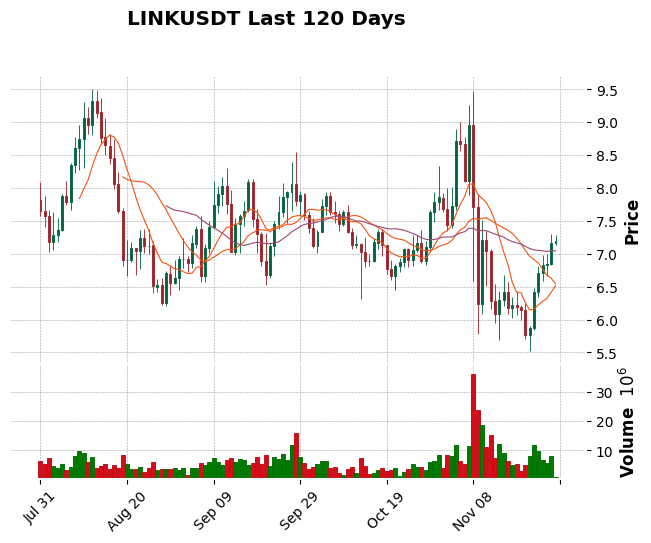

In [118]:
mpf.plot(hist_df.set_index('Close Time').tail(120), 
        type='candle', style='charles', 
        volume=True, 
        title='LINKUSDT Last 120 Days', 
        mav=(10,20,30))


In [119]:
hist_df.to_csv("/Users/Yousefmacer/Github/data_analytics/defi_capstone/binance/link_hist_df.csv",index=False)